[Link to the data](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset): 

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import log_loss, precision_score, recall_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler



In [146]:
df=pd.read_csv("data/heart-blood_data.csv")

In [147]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [148]:
#To make our model simpler, we will consider dropping some of the parameters. Of course, for the best results we should keep everythink but for this simple toy model it will be enough.
df.drop(columns=["oldpeak","thal","slope","ca","chol"],inplace=True) 
df.rename(columns={"cp":"chest pain","trestbps":"resting blood pressure","chol":"cholesterol","fbs":"fasting blood sugar","restecg":"resting ecg","thalach":"max heart rate","exang":"exercise angina","target":"disease_risk"},inplace=True)
df.head()

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,disease_risk
0,52,1,0,125,212,0,1,168,0,0
1,53,1,0,140,203,1,0,155,1,0
2,70,1,0,145,174,0,1,125,1,0
3,61,1,0,148,203,0,1,161,0,0
4,62,0,0,138,294,1,1,106,0,0


In [149]:
#Input variables and targets
scaler=StandardScaler()
X=df.drop(columns=["disease_risk"])
X_scaled=scaler.fit_transform(X)
y=df["disease_risk"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_scaled


array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.89125488,
         0.82132052, -0.71228712],
       [-0.15815703,  0.66150409, -0.91575542, ..., -1.00404855,
         0.2559679 ,  1.40392824],
       [ 1.71659547,  0.66150409, -0.91575542, ...,  0.89125488,
        -1.04869198,  1.40392824],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -1.00404855,
        -1.35311262,  1.40392824],
       [-0.4889957 , -1.51170646, -0.91575542, ..., -1.00404855,
         0.42992256, -0.71228712],
       [-0.04787747,  0.66150409, -0.91575542, ...,  0.89125488,
        -1.57055593, -0.71228712]])

In [150]:
model=LogisticRegression(max_iter=1000) #we set the max_iter, because otherwise we might get a ConvergenceWarning.
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [151]:
y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.5 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)

In [152]:
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)
logloss

0.4470242858326839

In [153]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1])

In [154]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Log Loss: 0.4470242858326839
Accuracy: 0.7951219512195122
Confusion Matrix:
 [[74 28]
 [14 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       102
           1       0.76      0.86      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [155]:
model.coef_[0]

array([-0.19339014, -0.89197339,  0.75124687, -0.37794006, -0.37024443,
       -0.04005265,  0.12489355,  0.89728066, -0.49320623])

In [156]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to hold the coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 most influential features
print(coefficients_df.head(10))


                  Feature  Coefficient  Abs_Coefficient
7          max heart rate     0.897281         0.897281
1                     sex    -0.891973         0.891973
2              chest pain     0.751247         0.751247
8         exercise angina    -0.493206         0.493206
3  resting blood pressure    -0.377940         0.377940
4             cholesterol    -0.370244         0.370244
0                     age    -0.193390         0.193390
6             resting ecg     0.124894         0.124894
5     fasting blood sugar    -0.040053         0.040053


In [157]:
TOP=5
top_features = coefficients_df['Feature'].head(TOP).values
print("Top features:", top_features)

Top features: ['max heart rate' 'sex' 'chest pain' 'exercise angina'
 'resting blood pressure']


In [158]:
TOP = 5  # Set the number of top features you want to use
top_features = coefficients_df['Feature'].head(TOP).values
print("Top features:", top_features)

# Subset the data to include only the top X features
X_top = df[top_features]
X_top_scaled = scaler.fit_transform(X_top)

# Train-test split with the top X features
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

# Train the new logistic regression model with top X features
model_top = LogisticRegression(max_iter=1000)
model_top.fit(X_train_top, y_train)

# Evaluate the new model
y_pred_proba_top = model_top.predict_proba(X_test_top)
threshold = 0.5
y_pred_top = (y_pred_proba_top[:, 1] > threshold).astype(int)

logloss_top = log_loss(y_test, y_pred_proba_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
confusion_mat_top = confusion_matrix(y_test, y_pred_top)
classification_rep_top = classification_report(y_test, y_pred_top)

print("Log Loss with top features:", logloss_top)
print("Accuracy with top features:", accuracy_top)
print("Confusion Matrix with top features:\n", confusion_mat_top)
print("Classification Report with top features:\n", classification_rep_top)

Top features: ['max heart rate' 'sex' 'chest pain' 'exercise angina'
 'resting blood pressure']
Log Loss with top features: 0.4579419217690121
Accuracy with top features: 0.7853658536585366
Confusion Matrix with top features:
 [[73 29]
 [15 88]]
Classification Report with top features:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       102
           1       0.75      0.85      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.78       205
weighted avg       0.79      0.79      0.78       205



                  Feature  Coefficient  Abs_Coefficient
7          max heart rate     0.897281         0.897281
1                     sex    -0.891973         0.891973
2              chest pain     0.751247         0.751247
8         exercise angina    -0.493206         0.493206
3  resting blood pressure    -0.377940         0.377940
4             cholesterol    -0.370244         0.370244
0                     age    -0.193390         0.193390
6             resting ecg     0.124894         0.124894
5     fasting blood sugar    -0.040053         0.040053


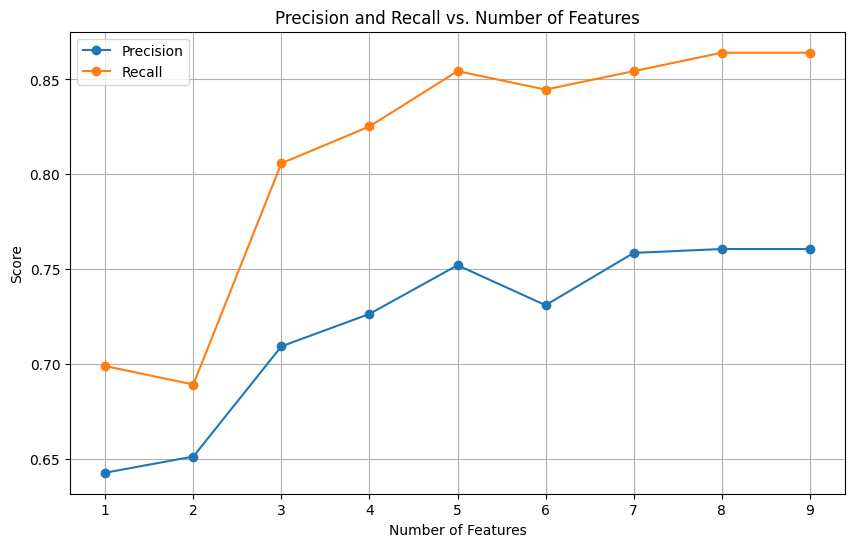

[0.6428571428571429, 0.6513761467889908, 0.7094017094017094, 0.7264957264957265, 0.7521367521367521, 0.7310924369747899, 0.7586206896551724, 0.7606837606837606, 0.7606837606837606]


In [159]:
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to hold the coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients_df)

# Iterate over the number of top features and store precision and recall
precisions = []
recalls = []
num_features_list = range(1, len(feature_names) + 1)

for num_features in num_features_list:
    top_features = coefficients_df['Feature'].head(num_features).values
    
    # Subset the data to include only the top N features
    X_top = df[top_features]
    X_top_scaled = scaler.fit_transform(X_top)
    
    # Train-test split with the top N features
    X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)
    
    # Train the new logistic regression model with top N features
    model_top = LogisticRegression(max_iter=1000)
    model_top.fit(X_train_top, y_train)
    
    # Predict and evaluate the model
    y_pred_proba_top = model_top.predict_proba(X_test_top)
    threshold = 0.5
    y_pred_top = (y_pred_proba_top[:, 1] > threshold).astype(int)
    
    # Calculate precision and recall
    precision_top = precision_score(y_test, y_pred_top)
    recall_top = recall_score(y_test, y_pred_top)
    
    precisions.append(precision_top)
    recalls.append(recall_top)

# Plot precision and recall as a function of the number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, precisions, label='Precision', marker='o')
plt.plot(num_features_list, recalls, label='Recall', marker='o')
plt.title('Precision and Recall vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print(precisions)
